# Motor Primitive Training



In [2]:
t1 = 1
t2 = 2
x = 5
y = 6
z = 7
st1 = 8
st2 = 9
st3 = 10
st4 = 11
lt1 = 12
lt2 = 13
lt3 = 14
lt4 = 15

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# Automatically reload external modules
%reload_ext autoreload
%autoreload 2
np.set_printoptions(suppress=True, precision=5)

plt.style.use(['fivethirtyeight', 'seaborn-darkgrid'])
plt.tight_layout()
plt.rcParams['figure.figsize'] = [10,10]


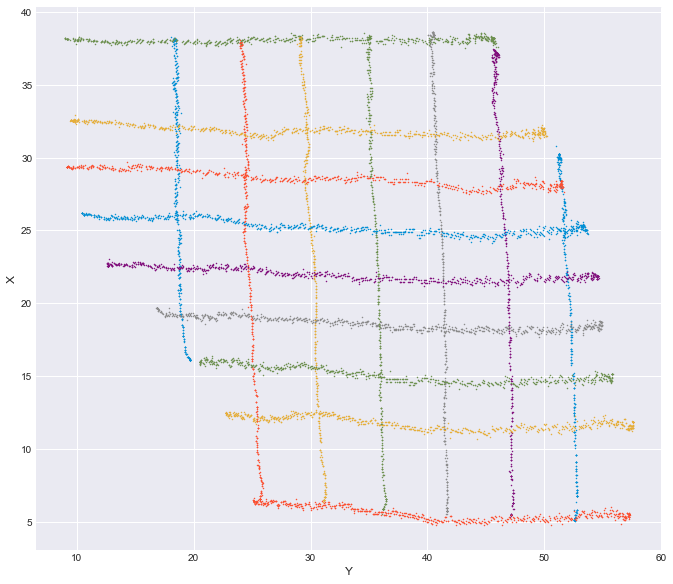

In [14]:
plt.rcParams['figure.figsize'] = [10,10]

# Plot X-direction Motor Primitive in Euclidean space
for i in range(33,40):
    filename = 'DataFolder/Data/xPrim/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.scatter(A[:,y], A[:,x], s=1, label= 'Y = %.2f' %np.mean(A[:, y]))


# Plot Y-direction Motor Primitive in Euclidean space
for i in range(40,49):
    filename = 'DataFolder/Data/yPrim/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.scatter(A[:,y], A[:,x], s = 1, label= 'X = %.2f' %np.mean(A[:, x]))


plt.xlabel("Y")
plt.ylabel("X")
plt.show()


## View X axis Motor Primitives

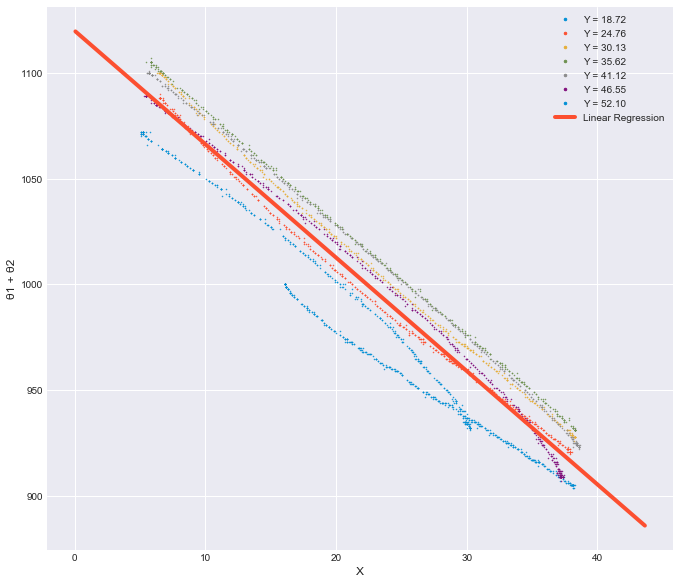

Linear Equation: (θ1 + θ2) = -5.3632658 * x + 1120.010
r2: 0.92776


In [16]:
grouped_x = []
grouped_y = []

for i in range(33,40):
    filename = 'DataFolder/Data/xPrim/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.plot(A[:,x], A[:,t1] + A[:,t2] , '.', ms = 1, label= 'Y = %.2f' %np.mean(A[:, y]))
    grouped_x.extend(A[:,x])
    grouped_y.extend(A[:,t1] + A[:,t2])

grouped_y = np.asarray(grouped_y)
grouped_x = np.mat(grouped_x).T

A1 = np.hstack([grouped_x, np.ones([grouped_x.shape[0], 1])])
c, residues, rank, s = scipy.linalg.lstsq(A1, grouped_y)
r2 = 1 - residues / np.sum((grouped_y - grouped_y.mean())**2)

line_x = np.linspace(grouped_x.min()-5, grouped_x.max()+5, 100)
line_y = line_x * c[0] + c[1]
plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5) 
plt.xlabel("X")
plt.ylabel("θ1 + θ2")
plt.show()

print ("Linear Equation: (θ1 + θ2) = %0.7f * x + %0.3f" % (c[0], c[1]))
print ("r2: %0.5f" % r2)

## Determine θ2 ~ x,y

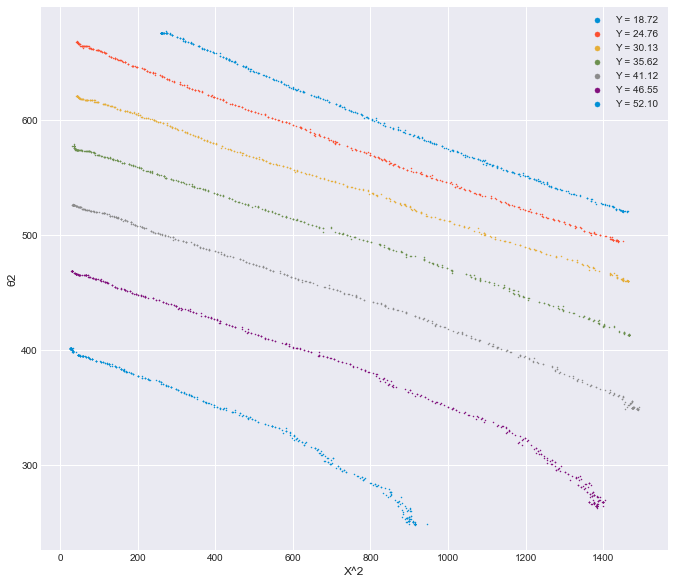

Linear Equation: θ2 = -0.1355965 * x **2 + -9.2264242 * y + 906.0431074
r2: 0.97327


In [17]:
grouped_x = []
grouped_y = []
grouped_alt = []

for i in range(33,40):
    filename = 'DataFolder/Data/xPrim/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2)
    plt.scatter(A[:,x]**2, A[:,t2], s = 1, label= 'Y = %.2f' %np.mean(A[:, y]))
    grouped_x.extend(A[:,x]**2)
    grouped_y.extend(A[:,t2])
    grouped_alt.extend(A[:,y])

grouped_y = np.asarray(grouped_y)

A2 = np.hstack((np.mat((grouped_x, grouped_alt)).T , np.ones([len(grouped_x), 1])))
AAinv = np.linalg.inv( np.dot(A2.T, A2) )
result = scipy.linalg.lstsq(A2, grouped_y)
b = result[0]
N = grouped_y.shape[0]
C = b.shape[0]
df_e = N-C
df_r = C-1
error = grouped_y - np.dot(A2, b)
sse = np.dot(error.T, error) / df_e
stderr = np.sqrt( np.diagonal( sse[0, 0] * AAinv ) )
t = b.T / stderr
p = 2*(1 - stats.t.cdf(abs(t), df_e))
r2 = 1 - error.var() / grouped_y.var()

# line_x = np.linspace(grouped_x.min(), grouped_x.max(), 100)
# line_alt = np.linspace(grouped_alt.min(), grouped_alt.max(), 100)
# line_y = line_x * b[0] + line_alt * b[1] + b[2]
# plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("X^2")
plt.ylabel("θ2")

plt.show()

print ("Linear Equation: θ2 = %0.7f * x **2 + %0.7f * y + %0.7f" % (b[0], b[1], b[2]))
print ("r2: %0.5f" % r2)

## View Y axis Motor Primitives

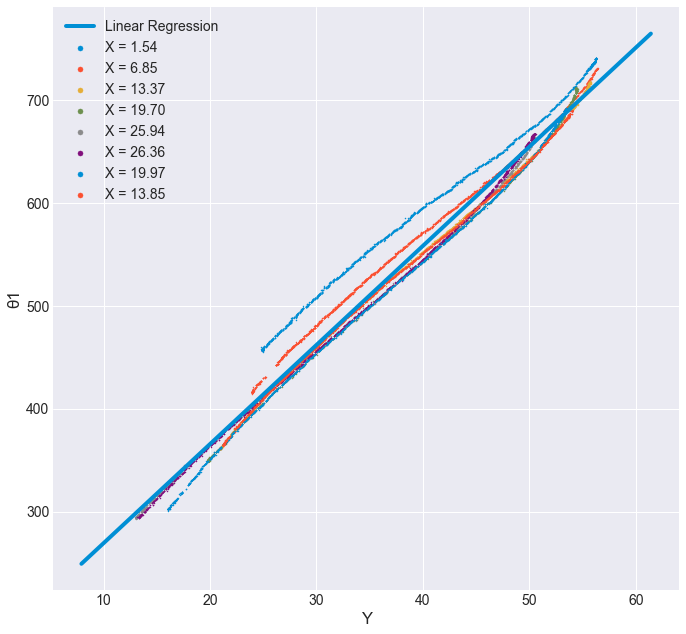

Linear Equation: θ1 = 9.6369024 * Y + 172.9397779
r2: 0.98081


In [132]:
grouped_x = []
grouped_y = []

for i in range(32,40):
    filename = 'DataFolder/Data/Y/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    plt.scatter(A[:,y], A[:,t1], s = 1, label= 'X = %.2f' %np.mean(A[:, x]))
    grouped_x.extend(A[:, y])
    grouped_y.extend(A[:,t1])

grouped_y = np.asarray(grouped_y)
grouped_x = np.mat(grouped_x).T

A3 = np.hstack([grouped_x, np.ones([grouped_x.shape[0], 1])])
c, residues, rank, s = scipy.linalg.lstsq(A3, grouped_y)
r2 = 1 - residues / np.sum((grouped_y - grouped_y.mean())**2)

line_x = np.linspace(grouped_x.min()-5, grouped_x.max()+5, 100)
line_y = line_x * c[0] + c[1]
plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("Y")
plt.ylabel("θ1")
plt.show()

print("Linear Equation: θ1 = %0.7f * Y + %0.7f" % (c[0], c[1]))
print("r2: %0.5f" % r2)
r2: 0.99276

## Determine θ2 ~ x,y

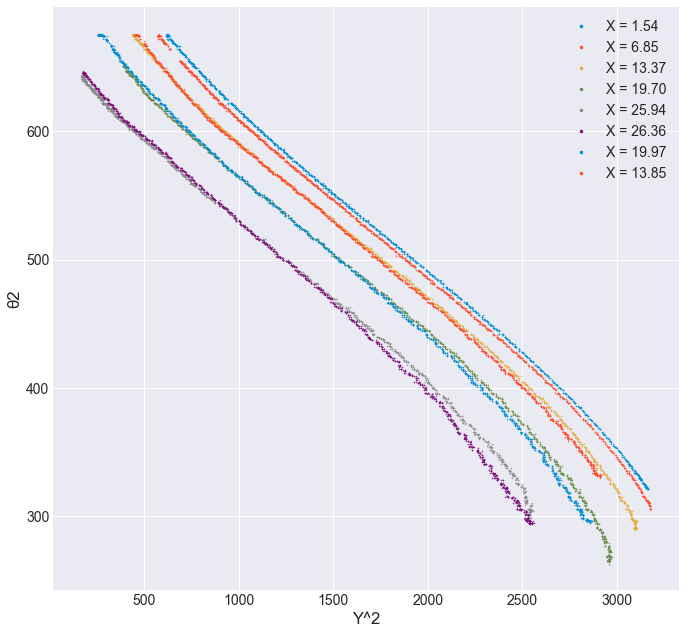

Linear Equation: θ2 = -0.1346154 * Y**2 + -4.0020760 * X + 775.8335807
r2: 0.99113


In [135]:
grouped_x = []
grouped_y = []
grouped_alt = []


for i in range(32,40):
    filename = 'DataFolder/Data/Y/Line%03i.csv' %i
    A = np.genfromtxt(filename, delimiter=",", skip_header=2 )
    A[:,t2] = A[:,t2]
    plt.plot(A[:,y]**2, A[:,t2], '.', ms = 1, label= 'X = %.2f' %np.mean(A[:, x]))
    grouped_x.extend(A[:,y]**2)
    grouped_y.extend(A[:,t2])
    grouped_alt.extend(A[:,x])

grouped_y = np.asarray(grouped_y)

A4 = np.hstack((np.mat((grouped_x, grouped_alt)).T , np.ones([len(grouped_x), 1])))
AAinv = np.linalg.inv( np.dot(A4.T, A4) )
result = scipy.linalg.lstsq(A4, grouped_y)
b = result[0]
N = grouped_y.shape[0]
C = b.shape[0]
df_e = N-C
df_r = C-1
error = grouped_y - np.dot(A4, b)
sse = np.dot(error.T, error) / df_e
stderr = np.sqrt( np.diagonal( sse[0, 0] * AAinv ) )
t = b.T / stderr
p = 2*(1 - stats.t.cdf(abs(t), df_e))
r2 = 1 - error.var() / grouped_y.var()

# line_x = np.linspace(grouped_x.min(), grouped_x.max(), 100)
# line_alt = np.linspace(grouped_alt.min(), grouped_alt.max(), 100)
# line_y = line_x * b[0] + line_alt * b[1] + b[2]
# plt.plot(line_x, line_y, '-', label='Linear Regression')

plt.legend(markerscale=5)
plt.xlabel("Y^2")
plt.ylabel("θ2")
plt.show()

print ("Linear Equation: θ2 = %0.7f * Y**2 + %0.7f * X + %0.7f" % (b[0], b[1], b[2]))
print ("r2: %0.5f" % r2)

## Experimenting with Motor Primitives

#### Motor Primitive I

The first set of motor primitives model the equations:
    
    For X : (θ1 + θ2) = -0.027x + 2.144
             θ2 = -0.044 * y + 3.146 * cos(0.00661375661π * x) + 0.395
        
    For Y :  θ1 = 0.046834 * Y - 1.856 
             θ2 = -0.03030x + 2.854 * cos(0.0071π * y) + 0.410

The first set of figures show the result of the first set of motor primitives when drawing a 10 x 10 cm square

In [117]:
filename = 'DataFolder/Results/Residuals Plotted(old).csv'
A = pd.read_csv(filename)
plt.plot(A['PX'], A['PY'], '.', ms = 2, label= "Predicted Trajectory")
plt.plot(A['X'], A['Y'], '.', ms = 2, label= "Recorded Trajectory")
plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("Y")

fig, ax = plt.subplots(2, 2, sharex='col')
ax[0, 0].plot(A['PX'],label = "Predicted X Trajectory")
ax[0, 0].plot(A['X'], label = "Recorded X Trajectory")
ax[0, 0].set_ylabel("X")
ax[0, 0].legend(markerscale=4)

ax[1, 0].plot(A['PY'], label = "Predicted Y Trajectory")
ax[1, 0].plot(A['Y'], label = "Recorded Y Trajectory")
ax[1, 0].set_ylabel("Y")
ax[1, 0].legend(markerscale=4)

ax[0, 1].bar(range(0,A.shape[0]),A['Residual X'], label = "X Residual")
ax[0, 1].legend(markerscale=0)
ax[1, 1].bar(range(0,A.shape[0]),A['Residual Y'], label = "Y Residual")
ax[1, 1].legend(markerscale=0)
plt.show()

AttributeError: 'list' object has no attribute 'plot'

We see that the inaccuracy in the Y-motor primitive is seen in a volatile X trajectory. The primitive was influincing more than one direction.

#### Motor Primitive II

The second set of motor primitives model the equations:

    For X : (θ1 + θ2) = -0.027x + 2.144
             θ2 = -0.044 * y + 3.146 * cos(0.00661375661π * x) + 0.395    
             
    For Y :  θ1 = 0.046834 * Y - 1.856 
             θ2 = -1.009 * θ1 - 0.2810 * θ**2 - 0.02886 * x + 2.208

This step involved finding a more accurate solution for the θ2 solution in the Y motor primitive

In [ ]:
filename = 'DataFolder/Results/NewMotorPrim(4:1).csv'
A = pd.read_csv(filename)
plt.plot(A['X'], A['Y'], '.', ms = 2, label= "Predicted Trajectory")

plt.legend(markerscale=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

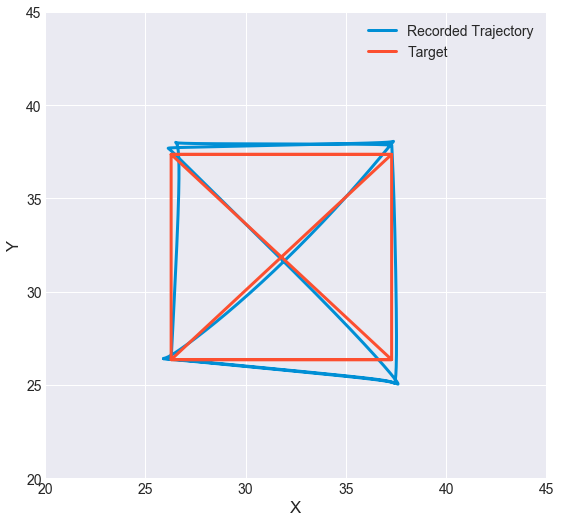

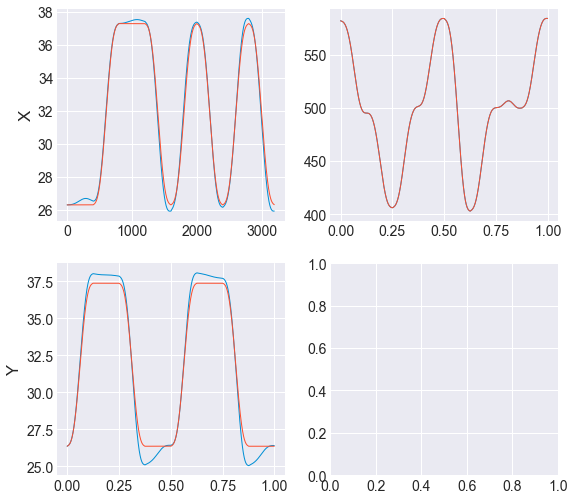

In [33]:
filename = 'DataFolder/Results/Simulated.csv'
A = pd.read_csv(filename)
A = A.iloc[:-10]
plt.rcParams['figure.figsize'] = [8,8]

plt.plot(A['x'], A['y'], '-', linewidth=3, label= "Recorded Trajectory")
plt.plot(A['goal_x'], A['goal_y'], '-', linewidth= 3, label= "Target")
plt.legend(markerscale=5)
plt.xlabel("X")
plt.xlim(20,45)
plt.ylabel("Y")
plt.ylim(20,45)

plt.rcParams['figure.figsize'] = [8,8]

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(A['x'], linewidth=1, label = "Recorded X Trajectory")
ax[0, 0].plot(A['goal_x'],  linewidth= 1, label = "Target X Trajectory")
# ax[0, 0].plot(A['SX'],label = "Simulation X Trajectory")
ax[0, 0].set_ylabel("X")
# ax[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
e = np.array(range(len(A['y'])))/len(A['y'])
ax[1, 0].plot(e,A['y'], linewidth=1, label = "Recorded Y Trajectory")
ax[1, 0].plot(e,A['goal_y'], linewidth=1, label = "Target Y Trajectory")
# ax[0, 0].plot(A['SY'],label = "Simulated X Trajectory")
ax[1, 0].set_ylabel("Y")
# ax[1, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)

ax[0, 1].plot(e,A['p2'], linewidth=1, label = "Recorded p2 Trajectory")
ax[0, 1].plot(e,A['goal_p2'], linewidth=1, label = "Target p2 Trajectory")

# ax[1, 1].plot(e,A['p1'], linewidth=1, label = "Recorded p1 Trajectory")
# ax[1, 1].plot(e,A['goal_p1'], linewidth=1, label = "Target p1 Trajectory")
# ax[0, 2].set_ylim((-4,4))
# ax[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
# # ax[1, 1].bar(range(0,A.shape[0]),A['RSY'], label = "Y Simulated Residual")
# ax[1, 2].bar(range(0,A.shape[0]),A['RPY'], label = "Y Target")
# ax[1, 2].set_ylim((-2,2))
# ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
plt.show()

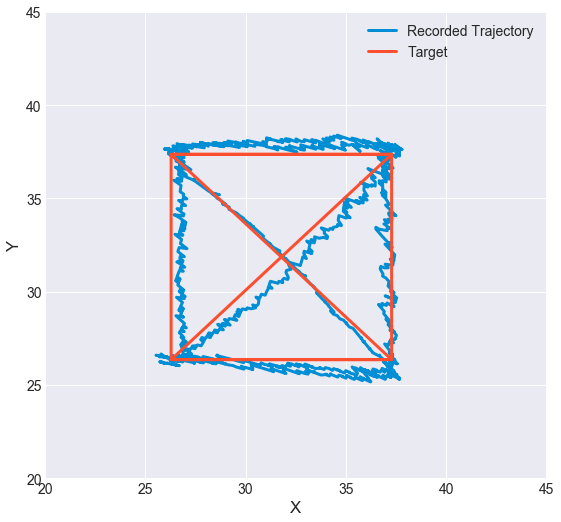

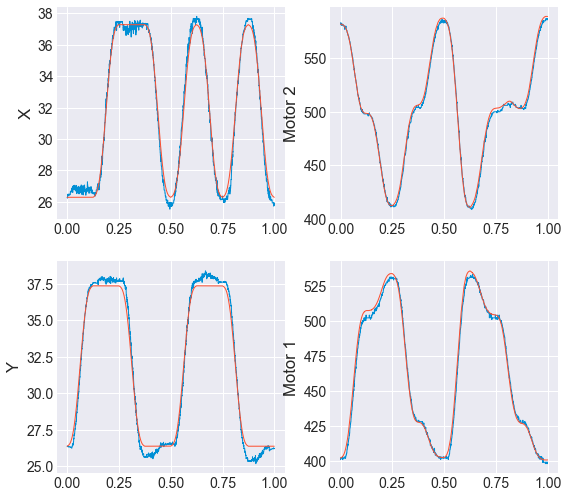

In [35]:
filename = 'DataFolder/Results/Recorded.csv'
A = pd.read_csv(filename)
plt.rcParams['figure.figsize'] = [8,8]

plt.plot(A['x'], A['y'], '-', linewidth=3, label= "Recorded Trajectory")
plt.plot(A['goal_x'], A['goal_y'], '-', linewidth= 3, label= "Target")
plt.legend(markerscale=5)
plt.xlabel("X")
plt.xlim(20,45)
plt.ylabel("Y")
plt.ylim(20,45)

plt.rcParams['figure.figsize'] = [8,8]
e = np.array(range(len(A['y'])))/len(A['y'])

fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(e,A['x'], linewidth=1, label = "Recorded X Trajectory")
ax[0, 0].plot(e,A['goal_x'],  linewidth= 1, label = "Target X Trajectory")
# ax[0, 0].plot(A['SX'],label = "Simulation X Trajectory")
ax[0, 0].set_ylabel("X")
# ax[0, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
ax[1, 0].plot(e,A['y'], linewidth=1, label = "Recorded Y Trajectory")
ax[1, 0].plot(e,A['goal_y'], linewidth=1, label = "Target Y Trajectory")
# ax[0, 0].plot(A['SY'],label = "Simulated X Trajectory")
ax[1, 0].set_ylabel("Y")
# ax[1, 0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)

ax[0, 1].plot(e,A['p2'], linewidth=1, label = "Recorded p2 Trajectory")
ax[0, 1].plot(e,A['goal_p2'], linewidth=1, label = "Target p2 Trajectory")
ax[0, 1].set_ylabel("Motor 2")

ax[1, 1].plot(e,A['p1'], linewidth=1, label = "Recorded p1 Trajectory")
ax[1, 1].plot(e,A['goal_p1'], linewidth=1, label = "Target p1 Trajectory")
ax[1, 1].set_ylabel("Motor 1")

# ax[0, 2].set_ylim((-4,4))
# ax[0, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
# # ax[1, 1].bar(range(0,A.shape[0]),A['RSY'], label = "Y Simulated Residual")
# ax[1, 2].bar(range(0,A.shape[0]),A['RPY'], label = "Y Target")
# ax[1, 2].set_ylim((-2,2))
# ax[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2, markerscale=4)
plt.show()

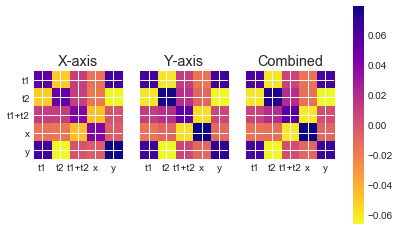

In [3]:
fig = plt.figure()
ax = fig.add_subplot(131)


A = pd.read_csv('DataFolder/Data/x/Line032.csv',skiprows=(1,1)) 
for i in range(33,38):
    filename = 'DataFolder/Data/X/Line%03i.csv' %i
    A = pd.concat((A, pd.read_csv(filename,skiprows=(1,1))))

s = A['t1'] + A['t2']   
A['t1+t2'] = s
A = A[['t1','t2','t1+t2','x','y']]
A=(A-A.min())/(A.max()-A.min())

cov = A.cov()
ax.set_title("X-axis", loc='center')
ax.set_xticks(np.arange(len(A.columns)))
ax.set_yticks(np.arange(len(A.columns)))
ax.set_xticklabels(list(A.columns))
ax.set_yticklabels(list(A.columns))
ax.imshow(cov,cmap="plasma_r")

a = fig.add_subplot(132)
A = pd.read_csv('DataFolder/Data/Y/Line032.csv',skiprows=(1,1)) 
for i in range(33,40):
    filename = 'DataFolder/Data/Y/Line%03i.csv' %i
    A = pd.concat((A, pd.read_csv(filename,skiprows=(1,1))))

s = A['t1'] + A['t2']   
A['t1+t2'] = s
A = A[['t1','t2','t1+t2','x','y']]
A=(A-A.min())/(A.max()-A.min())

cov = A.cov()
a.set_title("Y-axis", loc='center')
a.set_xticks(np.arange(len(A.columns)))
a.set_yticks(np.arange(len(A.columns)))
a.set_xticklabels(list(A.columns))
a.set_yticklabels(['']*len(A.columns))
im = a.imshow(cov, cmap="plasma_r")

ab = fig.add_subplot(133)
A = pd.read_csv('DataFolder/Data/Y/Line032.csv',skiprows=(1,1)) 
for i in range(33,40):
    filename = 'DataFolder/Data/Y/Line%03i.csv' %i
    A = pd.concat((A, pd.read_csv(filename,skiprows=(1,1))))
    
for i in range(32,38):
    filename = 'DataFolder/Data/X/Line%03i.csv' %i
    A = pd.concat((A, pd.read_csv(filename,skiprows=(1,1))))

s = A['t1'] + A['t2']   
A['t1+t2'] = s
A = A[['t1','t2','t1+t2','x','y']]
A=(A-A.min())/(A.max()-A.min())

cov = A.cov()
ab.set_title("Combined", loc='center')
ab.set_xticks(np.arange(len(A.columns)))
ab.set_yticks(np.arange(len(A.columns)))
ab.set_xticklabels(list(A.columns))
ab.set_yticklabels(['']*len(A.columns))
im = ab.imshow(cov, cmap="plasma_r")

cbar = fig.colorbar(im, ax=(ax,a,ab))
plt.show()

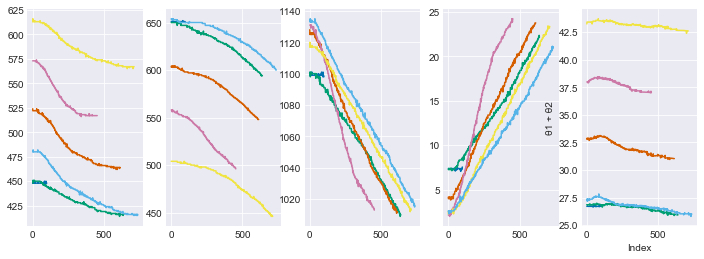

Linear Equation: (θ1 + θ2) = 9.6369024 * x + 172.940
r2: 0.98081


In [123]:
plt.rcParams['figure.figsize'] = [12,4]


fig, axes = plt.subplots(1,5)
p = ['t1','t2','t1+t2','x','y']
for i in range(32,38):
    f = i-32
    filename = 'DataFolder/Data/X/Line%03i.csv' %i
    A = pd.read_csv(filename,skiprows=(1,1))
    s = A['t1'] + A['t2']   
    A['t1+t2'] = s
    for j, name in enumerate(p):
        axes[j].plot(A['index'], A[name] , '-', ms = 1)

# plt.legend(markerscale=5)
plt.xlabel("Index")
plt.ylabel("θ1 + θ2")
plt.show()

print ("Linear Equation: (θ1 + θ2) = %0.7f * x + %0.3f" % (c[0], c[1]))
print ("r2: %0.5f" % r2)